# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
1. Capomulin and Ramicane both are effective treatments relative to the rest of the treatments available at fighting tumors. The tumor volumes are lower than the competing Ketapril and Infubinol.

2. The heavier the mouse the higher likelihood of larger tumors.  There's a positive correlation as shown in the linear regression analysis.

3. Capomulin treatments shows a reduction of the tumor over a period of over a month.  It does take roughly half a month to the see the initial results.  Capomulin is therefore a prime candidate for tumor treatment and has shown early signs of success in mice experiments.

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [144]:
# Checking the number of mice.
mice_count = combined_data['Mouse ID'].nunique()
mice_count

249

In [208]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids



array(['g989'], dtype=object)

In [148]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [150]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [152]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data['Mouse ID'].nunique()
clean_mouse_count


248

## Summary Statistics

In [213]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [215]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_stats = combined_data.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    variance=('Tumor Volume (mm3)', 'var'),
    std=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
)
agg_summary_stats



,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

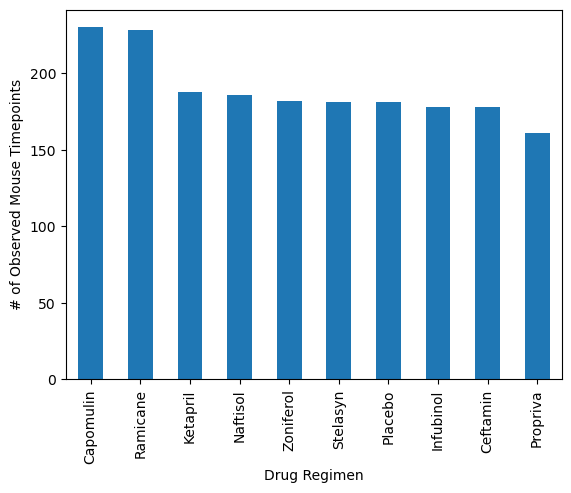

In [219]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_timepoints = combined_data['Drug Regimen'].value_counts()
drug_timepoints.plot(kind='bar', ylabel='# of Observed Mouse Timepoints')
plt.show()


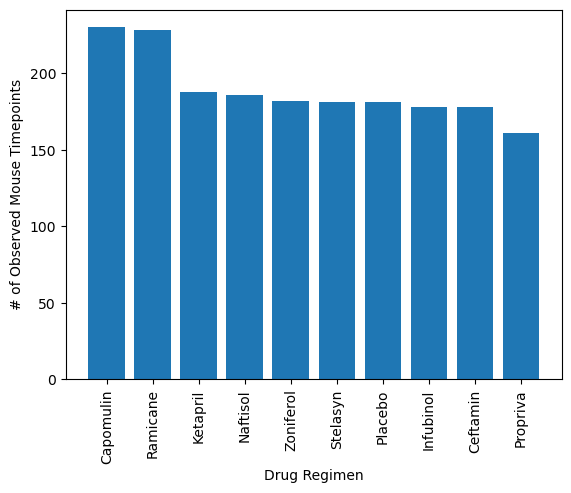

In [162]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_timepoints.index, drug_timepoints)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.show()


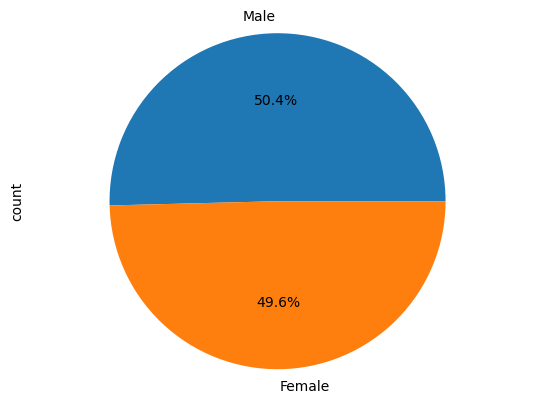

In [223]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study.

# Get the unique mice with their gender
gender_distribution = clean_data.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()

# Make the pie chart

# Adjusting startangle to rotate
gender_distribution.plot(kind='pie', autopct='%1.1f%%')  

# Keeping the "count" label
plt.ylabel('count') 

# Ensures the pie chart is a perfect circle
plt.axis('equal')  

# Print
plt.show()



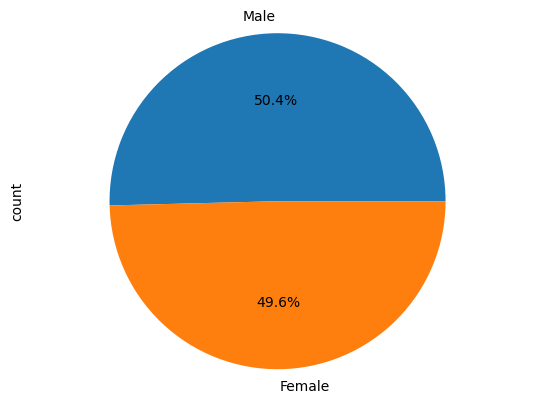

In [166]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study.

# Get the unique mice with their gender
gender_distribution = clean_data.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()

# Make the pie chart using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.ylabel('count')  # Keep the count label on the side
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()



## Quartiles, Outliers and Boxplots

In [169]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')



In [171]:
# Put treatments into a list for a loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each drug in treatment_list
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Append tumor vol data for each drug
    tumor_vol_data.append(drug_tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = drug_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = drug_tumor_vol[(drug_tumor_vol < lower_bound) | (drug_tumor_vol > upper_bound)]
    print(f'{drug}\'s potential outliers: {outliers}')



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


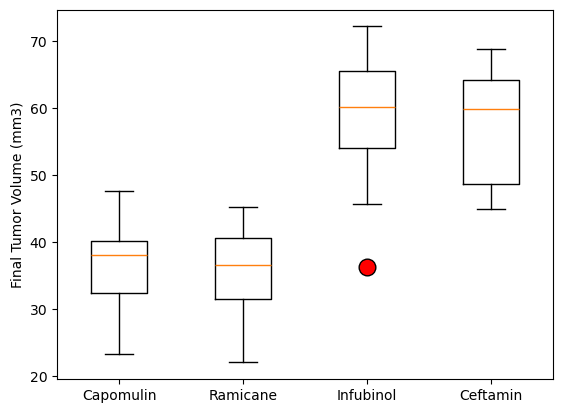

In [225]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, 
            tick_labels=treatment_list, 
            flierprops=dict(marker='o', markerfacecolor='r', markersize=12))  # Adjust to match the red circle for outliers

# Set the y-axis label and show the plot
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()



## Line and Scatter Plots

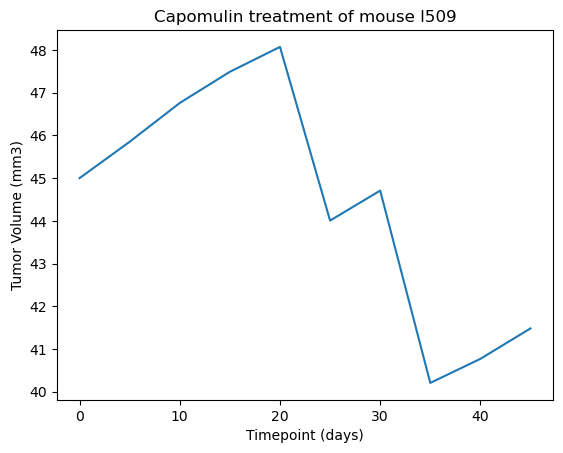

In [176]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin.
capomulin_mouse = clean_data.loc[clean_data['Mouse ID'] == 'l509']

plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


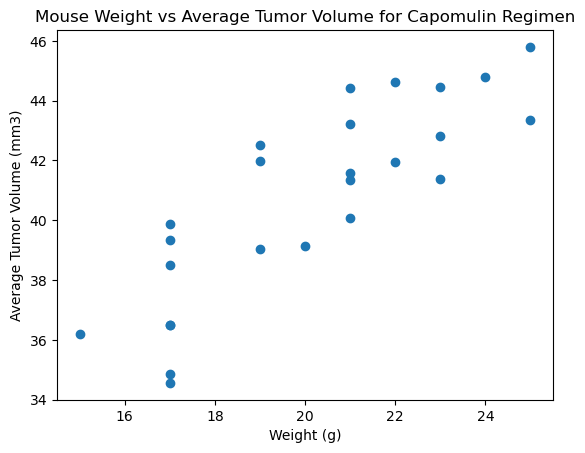

In [180]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen.
capomulin_grouped = clean_data[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean(numeric_only=True)

plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


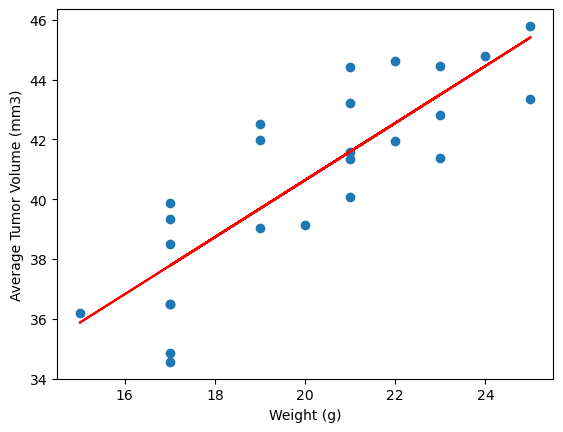

In [200]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Get the data for the Capomulin regimen, ensuring only numeric columns are selected
capomulin_grouped = clean_data[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean(numeric_only=True)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

# Print the correlation coefficient separately
print(f"The correlation between mouse weight and the average tumor volume is {r_value:.2f}")

# Create the scatter plot
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

# Plot the linear regression line
plt.plot(capomulin_grouped['Weight (g)'], slope * capomulin_grouped['Weight (g)'] + intercept, color='red')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()
